In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def read_data(file, num_rows, num_cols):
    with open(file, 'rb') as f:
        count = 0
        if num_cols != 1:
            f.read(16)  # 47040016 - (60000*28*28)
        else:
            f.read(8)
        mat = []
        while count < num_rows:
            t = []
            for i in range(num_cols):
                # https://www.delftstack.com/howto/python/how-to-convert-bytes-to-integers/
                t.append(int.from_bytes(f.read(1), "big"))
            mat.append(t)
            count += 1

        # print(len(mat), len(mat[0]))
        # print(mat[0])
        return mat


def create_data_frame(matrix, num_cols):
    # Creating column name list
    col_list = []
    if num_cols != 1:
        for i in range(28 * 28):
            col_list.append('f' + str(i))
        # print(col_list)
    else:
        col_list.append('label')

    # Creating data_frame using pandas
    df = pd.DataFrame(matrix, columns=col_list)
    return df



In [7]:
train_features = create_data_frame(read_data('train-images-idx3-ubyte', 60000, 28 * 28), 28 * 28)
print(train_features.shape)

train_classes = create_data_frame(read_data('train-labels-idx1-ubyte', 60000, 1), 1)
print(train_classes.shape)

test_features = create_data_frame(read_data('t10k-images-idx3-ubyte', 10000, 28 * 28), 28 * 28)
print(test_features.shape)

test_classes = create_data_frame(read_data('t10k-labels-idx1-ubyte', 10000, 1), 1)
print(test_classes.shape)

''' 
#### to find extra bytes at the beginning
with open('t10k-labels-idx1-ubyte', 'rb') as f:
    count = 0
    byte = f.read(1)
    while byte:
        count += 1
        byte = f.read(1)
    print(count)

# 'train-images-idx3-ubyte' : 16
# 'train-labels-idx1-ubyte' : 8
# 't10k-images-idx3-ubyte' : 16
# 't10k-labels-idx1-ubyte' : 8
'''

train = pd.concat([train_features, train_classes], axis=1)
print(train.shape)

test = pd.concat([test_features, test_classes], axis=1)
print(test.shape)

(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)
(60000, 785)
(10000, 785)


In [18]:
nums = []
for i in range(10):
    df = train[train.label == i]
    nums.append(df)

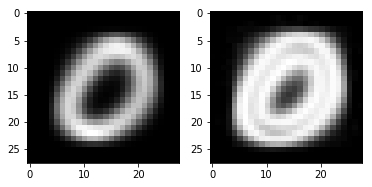

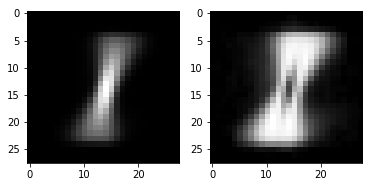

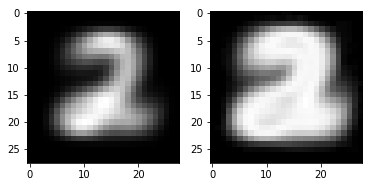

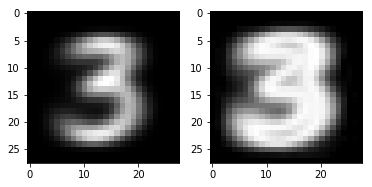

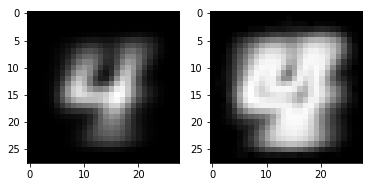

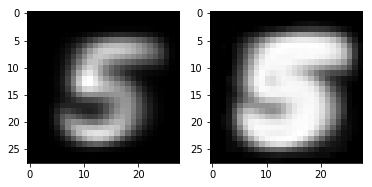

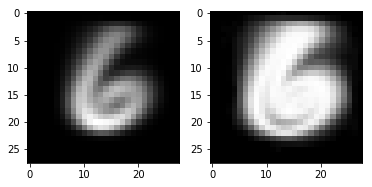

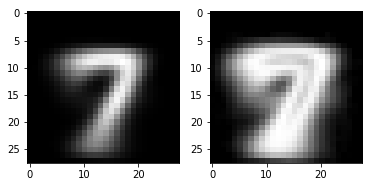

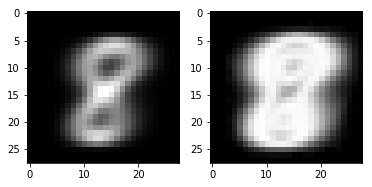

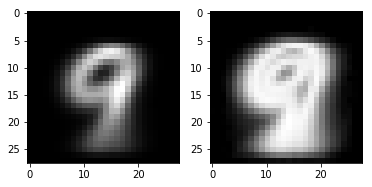

In [68]:
for i in range(len(nums)):
    df = nums[i]
    sum_img = []
    std_img = []
    den = df.shape[0]
    for j in range(df.shape[1]):
        t = df.iloc[:,j]
        sum_img.append(t.mean())
        std_img.append(t.std())
    #print(sum_img)
    
    # Mean img
    t = np.array(sum_img[:-1])
    sum_img = t.reshape(28,28)
    #plt.imshow(sum_img, cmap="gray")
    #plt.show()
    
    #standard deviation img
    t = np.array(std_img[:-1])
    std_img = t.reshape(28,28)
    
    #plt.imshow(std_img, cmap="gray")
    #plt.show()
    
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(sum_img, cmap = "gray")
    axarr[1].imshow(std_img, cmap = "gray")
    